In [89]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [6]:
df = pd.read_csv('/Users/alantrinh/Code/Spiced Academy/data/train.csv')

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


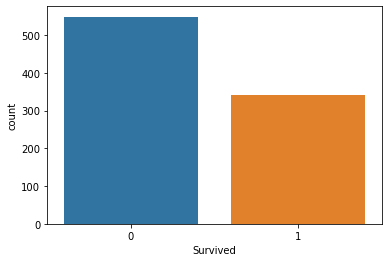

In [8]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

sns.countplot(data=df, x='Survived');

In [9]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

df_first_class=df[df['Pclass'] == 1]
first_class_survival_percentage = len(df_first_class[df_first_class['Survived'] == 1]) / len(df_first_class) * 100
print(f'Proportion of surviving 1st class passengers: {round(first_class_survival_percentage, 2)}%')

Proportion of surviving 1st class passengers: 62.96%


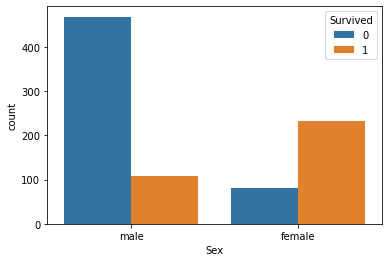

In [10]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
sns.countplot(data=df, x='Sex', hue='Survived');

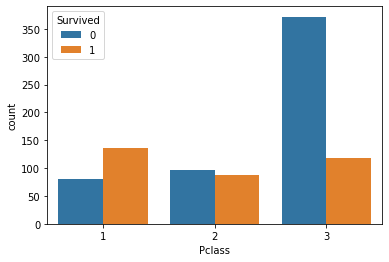

In [11]:
sns.countplot(data=df, x='Pclass', hue='Survived');

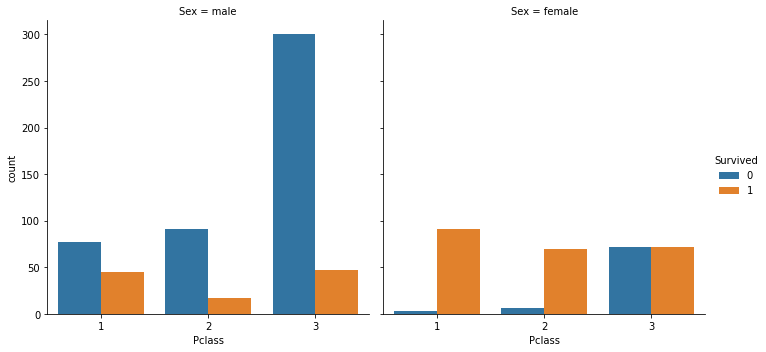

In [12]:
sns.catplot(data=df, kind='count', x='Pclass', hue='Survived', col='Sex');

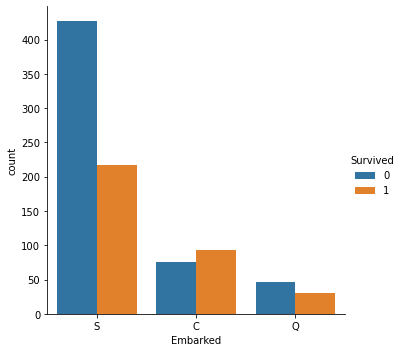

In [525]:
sns.catplot(data=df, kind='count', x='Embarked', hue='Survived');

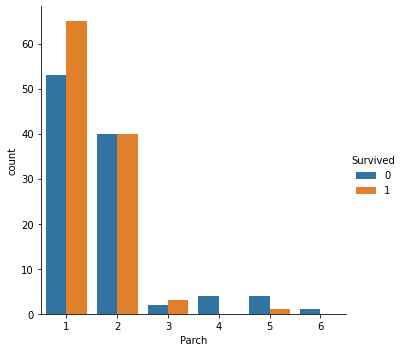

In [535]:
sns.catplot(data=df[df['Parch'] > 0], kind='count', x='Parch', hue='Survived');

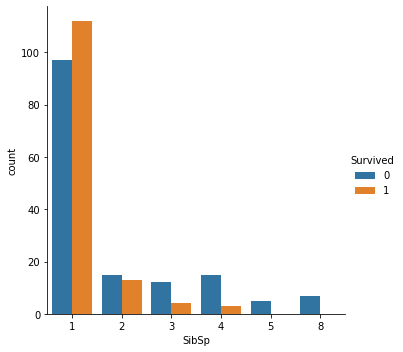

In [537]:
sns.catplot(data=df[df['SibSp'] > 0], kind='count', x='SibSp', hue='Survived');

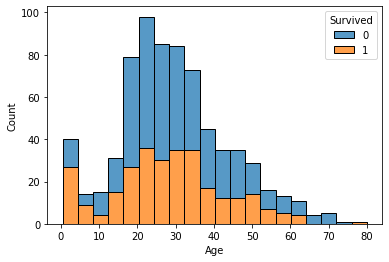

In [13]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack');

In [14]:
# Calculate the average age for survived and drowned passengers separately.

df_survived = df[df['Survived'] == 1]
df_survived['Age'].mean()

28.343689655172415

In [15]:
df_drowned = df[df['Survived'] == 0]
df_drowned['Age'].mean()

30.62617924528302

In [16]:
# Replace missing age values by the mean age.
mean_age = round(df['Age'].mean()) # rounded mean Age
df['Age'] = df['Age'].fillna(mean_age)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

pd.pivot_table(data=df[['Survived', 'Sex', 'Pclass']], aggfunc=len, index=['Sex', 'Survived'], columns=['Pclass'])

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

In [53]:
# Build a LogReg model for the Titanic data.
# Start with the Pclass column only (because it is numerical and complete).

X = df[['Pclass']]
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [54]:
m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Print the coefficients calculated by the model.
m.coef_, m.intercept_

(array([[-0.81769808]]), array([1.33995144]))

In [58]:
# Calculate the probabilities for your data points belonging to the positive class (second value is the survival probability)
m.predict_proba(X_train)

array([[0.75271456, 0.24728544],
       [0.75271456, 0.24728544],
       [0.57332857, 0.42667143],
       ...,
       [0.57332857, 0.42667143],
       [0.37232547, 0.62767453],
       [0.75271456, 0.24728544]])

In [78]:
# Suppose you classify all points with a probability > 0.9 as positive.
# How does the result of your prediction change?
# All predictions are of non-survival

m.predict_proba(X_train)[:,1] > 0.9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [80]:
# Suppose you classify all points with a probability > 0.1 as positive.
# How does the result of your prediction change?
# All predictions are now of survival

m.predict_proba(X_train)[:,1] >= 0.1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [81]:
# Use a classification model to predict the survival for the passengers of the Titanic. Evaluate your model:
# calculate an accuracy
m.score(X_train, y_train)

0.6841317365269461

In [83]:
m.score(X_val, y_val)

0.6636771300448431

In [85]:
# calculate precision and recall

y_pred = m.predict(X_val)
metrics.precision_score(y_val, y_pred, pos_label=1)

0.6515151515151515

In [88]:
metrics.recall_score(y_val, y_pred, pos_label=1)

0.45263157894736844

In [94]:
# use scikit-learn’s DummyClassifier and perform some simple baseline evaluations
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_val)
dummy_clf.score(X_val, y_val)

0.5739910313901345

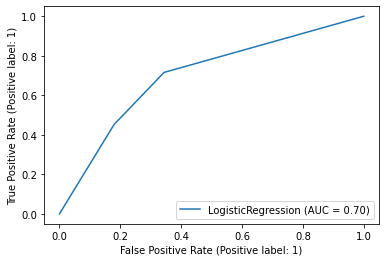

In [106]:
# draw a ROC curve or precision-recall plot
metrics.RocCurveDisplay.from_estimator(m, X_val, y_val);

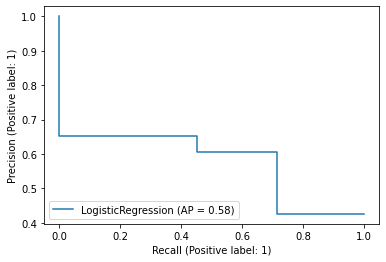

In [108]:
metrics.PrecisionRecallDisplay.from_estimator(m, X_val, y_val);

In [469]:
# Create a few ColumnTransformers and train them on the Titanic data. Here are a few ideas to work on:
# impute the missing values in the Age column

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df = pd.read_csv('/Users/alantrinh/Code/Spiced Academy/data/train.csv')
X = df[['Pclass', 'Age']]
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
X_train

,Pclass,Age
443,2,28.0
70,2,32.0
705,2,39.0
747,2,30.0
35,1,42.0
...,...,...
437,2,24.0
59,3,11.0
478,3,22.0
593,3,NaN


In [470]:
trans = ColumnTransformer([
    ('missing', SimpleImputer(strategy='mean'), ['Age'])
])
X_train_fe = trans.fit_transform(X_train)
X_train['Age'] = X_train_fe
X_train

,Pclass,Age
443,2,28.00000
70,2,32.00000
705,2,39.00000
747,2,30.00000
35,1,42.00000
...,...,...
437,2,24.00000
59,3,11.00000
478,3,22.00000
593,3,29.39633
